# Import Libraries

In [7]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline
from sklearn.preprocessing import LabelEncoder

# Data Reading Set using Pandas

In [8]:
credit = pd.read_csv('/Users/sofyanovatskaya/Documents/Study/UT_Austin_DAA/Data_Science/default of credit card clients.csv', skiprows=1)
credit.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,female,university,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,default
1,2,120000,female,university,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,3,90000,female,university,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,4,50000,female,university,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,5,50000,male,university,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


In [9]:
credit['default'] = credit['default payment next month']

# Drop unneeded columns

In [10]:
credit = credit.drop(['ID','default payment next month'], axis=1)
credit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,20000,female,university,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,default
1,120000,female,university,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,default
2,90000,female,university,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,not default
3,50000,female,university,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,not default
4,50000,male,university,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,not default


# Encode as needed

In [11]:
le = LabelEncoder()
le.fit(credit['SEX'])
credit['SEX'] = le.transform(credit['SEX'])

In [12]:
le = LabelEncoder()
le.fit(credit['default'])
credit['default'] = le.transform(credit['default'])

In [13]:
credit = pd.get_dummies(credit)

# Shift Pay features "-2" and "-1" to "0"

In [14]:
#shift pay features for -2
credit['PAY_0'] = credit['PAY_0'].replace(-2,0)
credit['PAY_2'] = credit['PAY_2'].replace(-2,0)
credit['PAY_3'] = credit['PAY_3'].replace(-2,0)
credit['PAY_4'] = credit['PAY_4'].replace(-2,0)
credit['PAY_5'] = credit['PAY_5'].replace(-2,0)
credit['PAY_6'] = credit['PAY_6'].replace(-2,0)

credit['PAY_0'] = credit['PAY_0'].replace(-1,0)
credit['PAY_2'] = credit['PAY_2'].replace(-1,0)
credit['PAY_3'] = credit['PAY_3'].replace(-1,0)
credit['PAY_4'] = credit['PAY_4'].replace(-1,0)
credit['PAY_5'] = credit['PAY_5'].replace(-1,0)
credit['PAY_6'] = credit['PAY_6'].replace(-1,0)

In [15]:
credit.head()

,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_other,EDUCATION_university
0,20000,0,1,24,2,2,0,0,0,0,...,689,0,0,0,0,0,0,0,0,1
1,120000,0,2,26,0,2,0,0,0,2,...,1000,1000,1000,0,2000,0,0,0,0,1
2,90000,0,2,34,0,0,0,0,0,0,...,1500,1000,1000,1000,5000,1,0,0,0,1
3,50000,0,1,37,0,0,0,0,0,0,...,2019,1200,1100,1069,1000,1,0,0,0,1
4,50000,1,1,57,0,0,0,0,0,0,...,36681,10000,9000,689,679,1,0,0,0,1


# Analysis

In [16]:
header = credit.dtypes.index
print(header)

Index(['LIMIT_BAL', 'SEX', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3',
       'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default',
       'EDUCATION_graduate school', 'EDUCATION_high school', 'EDUCATION_other',
       'EDUCATION_university'],
      dtype='object')


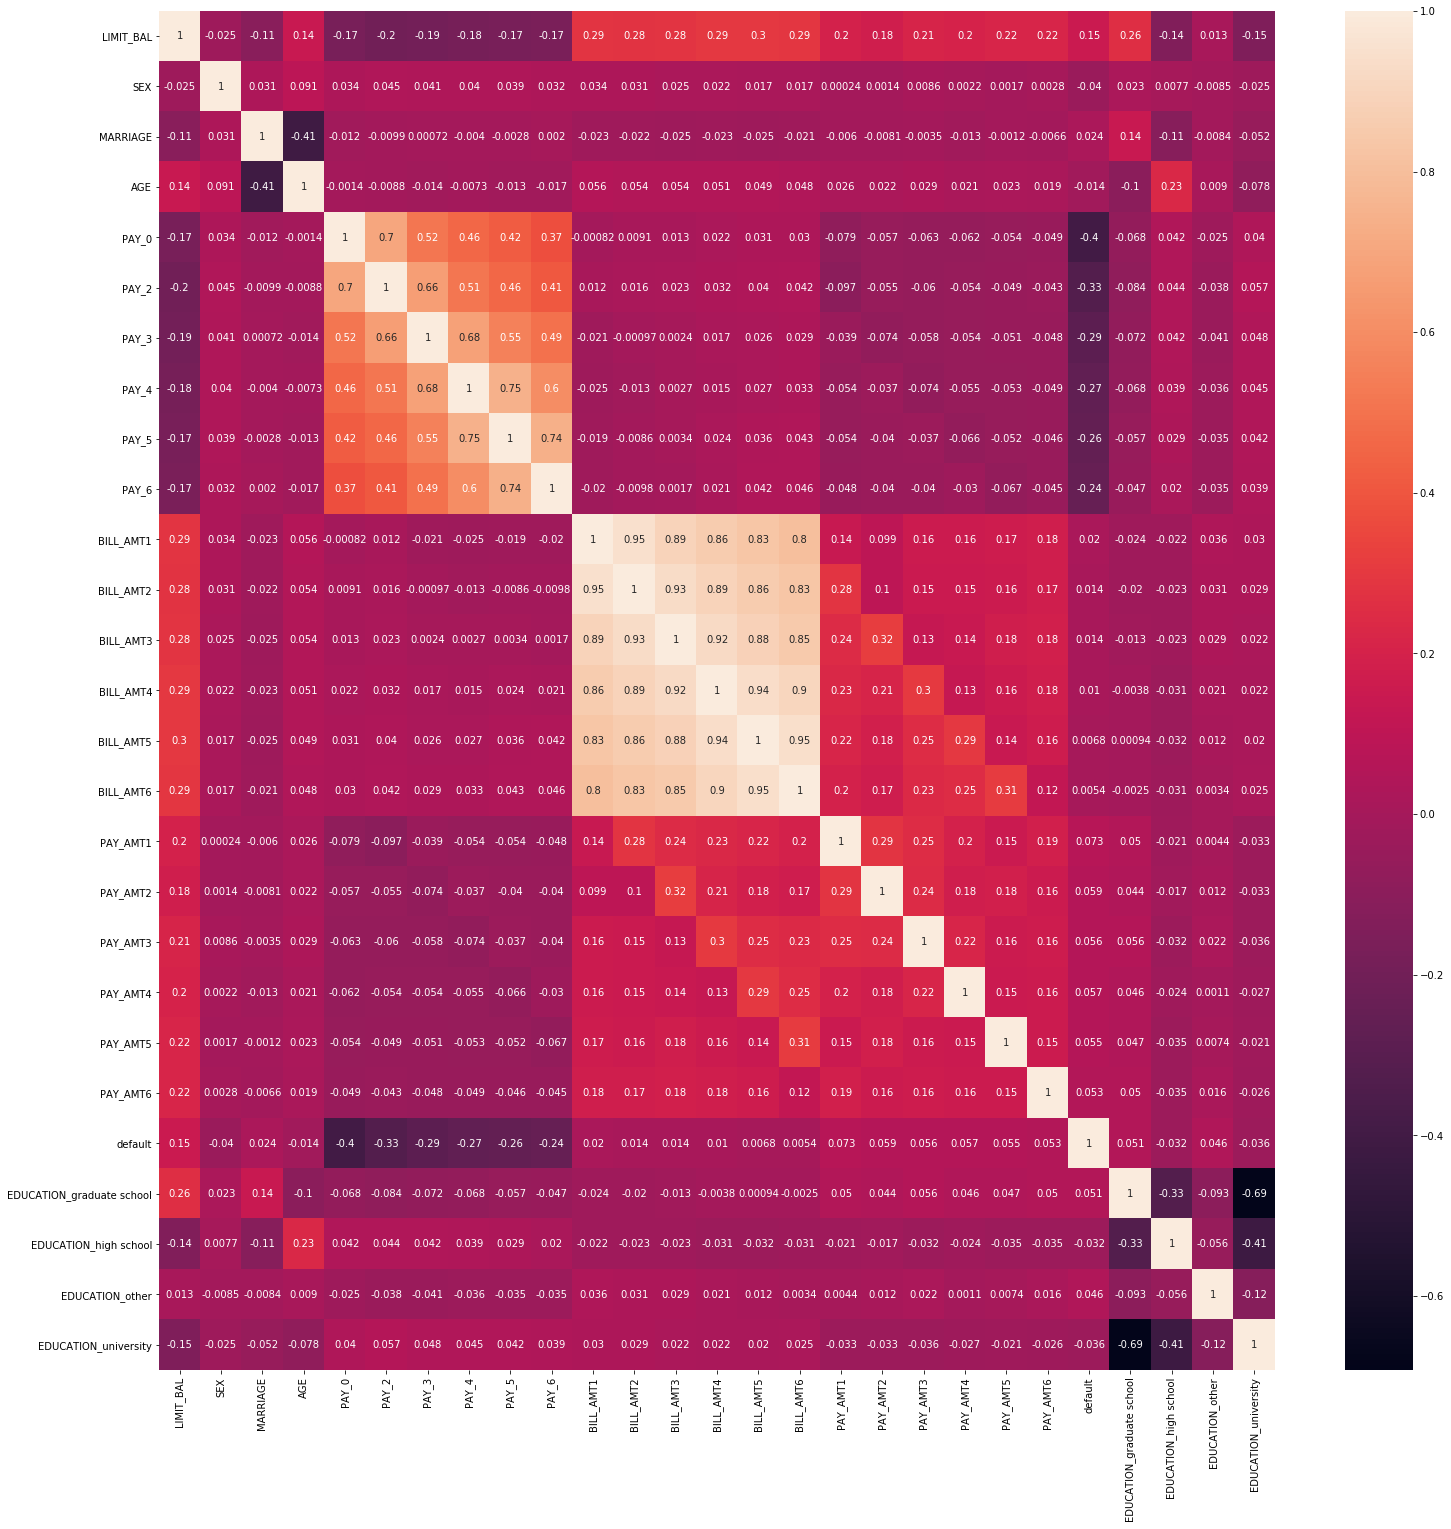

In [17]:
#correlation
credit_corr = credit.corr()
plt.figure(figsize=(25,25))
sns.heatmap(credit_corr, annot=True)
plt.show()

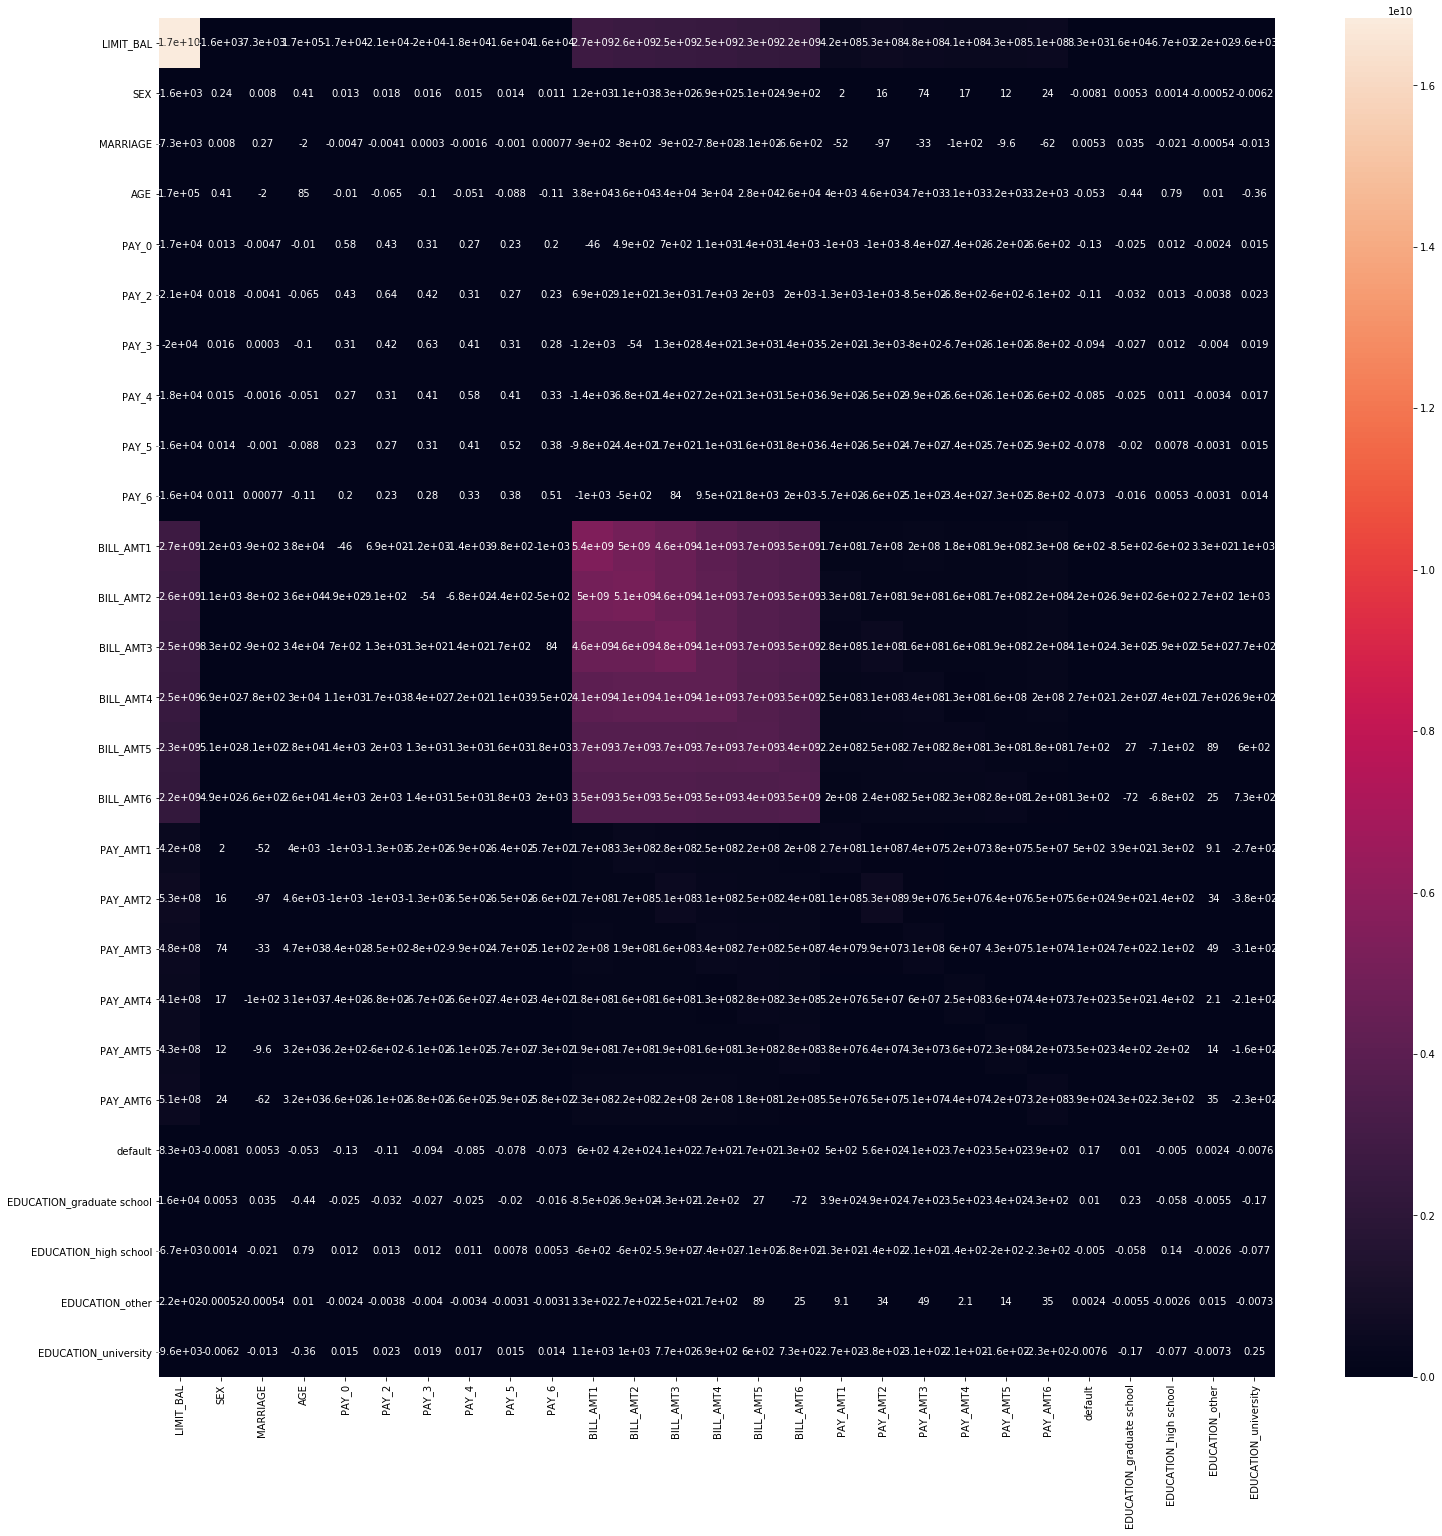

In [18]:
credit_cov = credit.cov()
plt.figure(figsize=(25,25))
sns.heatmap(credit_cov, annot=True)
plt.show()

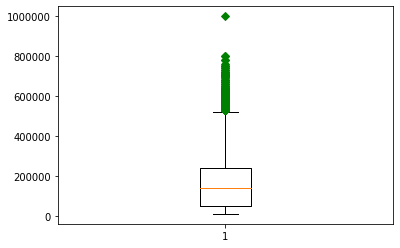

In [19]:
A = credit['LIMIT_BAL']
plt.boxplot(A,0,'gD')
plt.show()

# Number of defaults 

In [20]:
credit.groupby('PAY_0')['PAY_0'].count()

PAY_0
0    23182
1     3688
2     2667
3      322
4       76
5       26
6       11
7        9
8       19
Name: PAY_0, dtype: int64

/Users/sofyanovatskaya/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


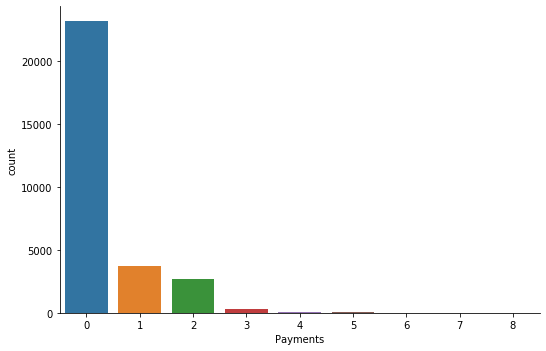

In [21]:
fg = sns.factorplot('PAY_0', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Payments')
plt.show()

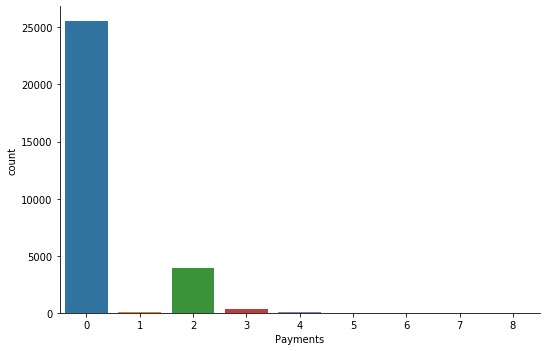

In [22]:
fg = sns.factorplot('PAY_2', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Payments')
plt.show()

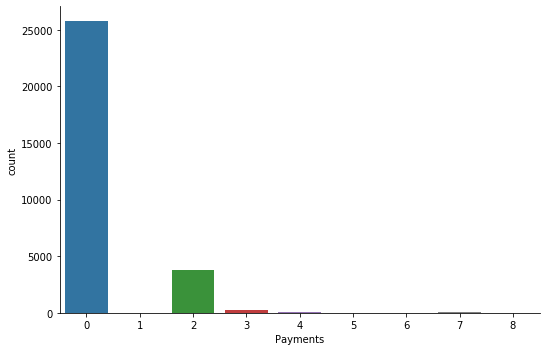

In [23]:
fg = sns.factorplot('PAY_3', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Payments')
plt.show()

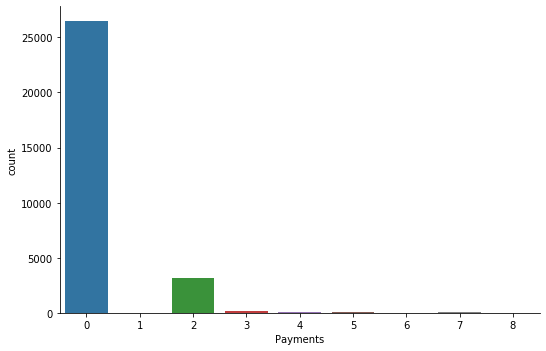

In [24]:
fg = sns.factorplot('PAY_4', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Payments')
plt.show()

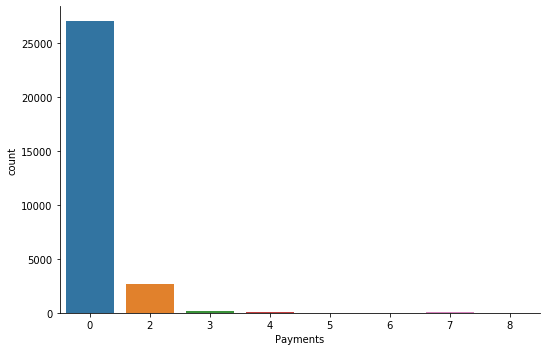

In [25]:
fg = sns.factorplot('PAY_5', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Payments')
plt.show()

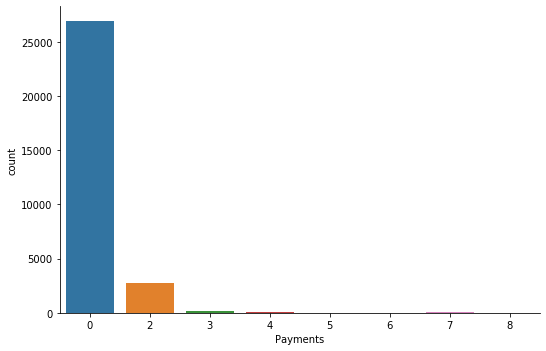

In [26]:
fg = sns.factorplot('PAY_6', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Payments')
plt.show()

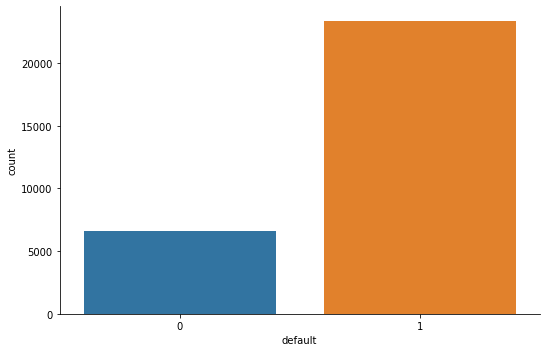

In [27]:
fg = sns.factorplot('default', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('default')
plt.show()

In [28]:
credit.groupby('default')['default'].count()

default
0     6636
1    23364
Name: default, dtype: int64

In [29]:
table = pd.crosstab(index=[credit.default,credit.SEX], columns=[credit.AGE,credit.LIMIT_BAL])

In [30]:
table.unstack()

AGE           21                                             ...     74     \
LIMIT_BAL 10000     20000     30000     50000     60000      ... 160000      
SEX            0  1      0  1      0  1      0  1      0  1  ...      0  1   
default                                                      ...             
0              3  3      2  2      3  0      1  0      0  0  ...      0  0   
1              4  5     16  8     14  1      2  2      1  0  ...      1  0   

AGE           75                            79     
LIMIT_BAL 180000    210000    250000    440000     
SEX            0  1      0  1      0  1      0  1  
default                                            
0              0  1      0  0      0  0      0  0  
1              0  0      0  1      1  0      0  1  

[2 rows x 4148 columns]

In [31]:
table.columns, table.index

(MultiIndex([(21,  10000),
             (21,  20000),
             (21,  30000),
             (21,  50000),
             (21,  60000),
             (22,  10000),
             (22,  20000),
             (22,  30000),
             (22,  40000),
             (22,  50000),
             ...
             (72, 300000),
             (73,  80000),
             (73, 140000),
             (73, 360000),
             (73, 500000),
             (74, 160000),
             (75, 180000),
             (75, 210000),
             (75, 250000),
             (79, 440000)],
            names=['AGE', 'LIMIT_BAL'], length=2074),
 MultiIndex([(0, 0),
             (0, 1),
             (1, 0),
             (1, 1)],
            names=['default', 'SEX']))

In [32]:
credit.groupby(['default', 'LIMIT_BAL'])['default'].count()

default  LIMIT_BAL
0        10000        197
         20000        698
         30000        568
         40000         92
         50000        885
                     ... 
1        750000         4
         760000         1
         780000         2
         800000         2
         1000000        1
Name: default, Length: 145, dtype: int64

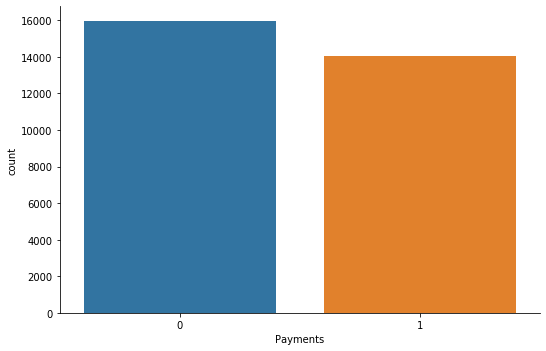

In [33]:
fg = sns.factorplot('EDUCATION_university', data=credit, kind='count', aspect=1.5)
fg.set_xlabels('Payments')
plt.show()

In [34]:
credit.groupby(['SEX', 'default'])['SEX'].count()

SEX  default
0    0           3763
     1          14349
1    0           2873
     1           9015
Name: SEX, dtype: int64

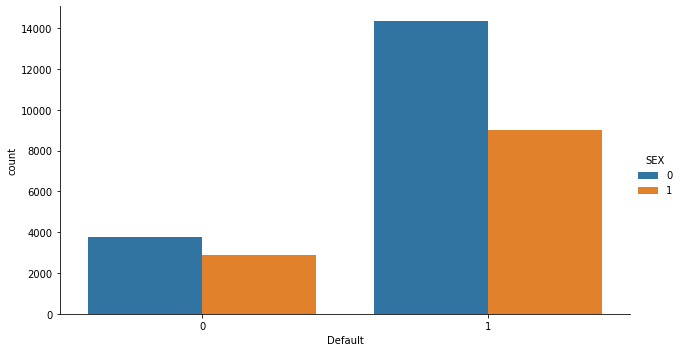

In [35]:
fg = sns.factorplot('default', data=credit, hue='SEX', kind='count', aspect=1.75)
fg.set_xlabels('Default')

In [36]:
credit.groupby(['MARRIAGE', 'default'])['MARRIAGE'].count()

MARRIAGE  default
0         0              5
          1             49
1         0           3206
          1          10453
2         0           3341
          1          12623
3         0             84
          1            239
Name: MARRIAGE, dtype: int64

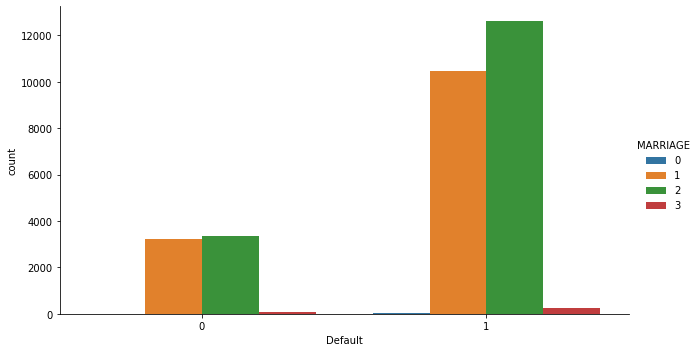

In [37]:
fg = sns.factorplot('default', data=credit, hue='MARRIAGE', kind='count', aspect=1.75)
fg.set_xlabels('Default')

In [38]:
credit.groupby(['LIMIT_BAL', 'default'])['LIMIT_BAL'].count()

LIMIT_BAL  default
10000      0           197
           1           296
16000      1             2
20000      0           698
           1          1278
                      ... 
750000     1             4
760000     1             1
780000     1             2
800000     1             2
1000000    1             1
Name: LIMIT_BAL, Length: 145, dtype: int64

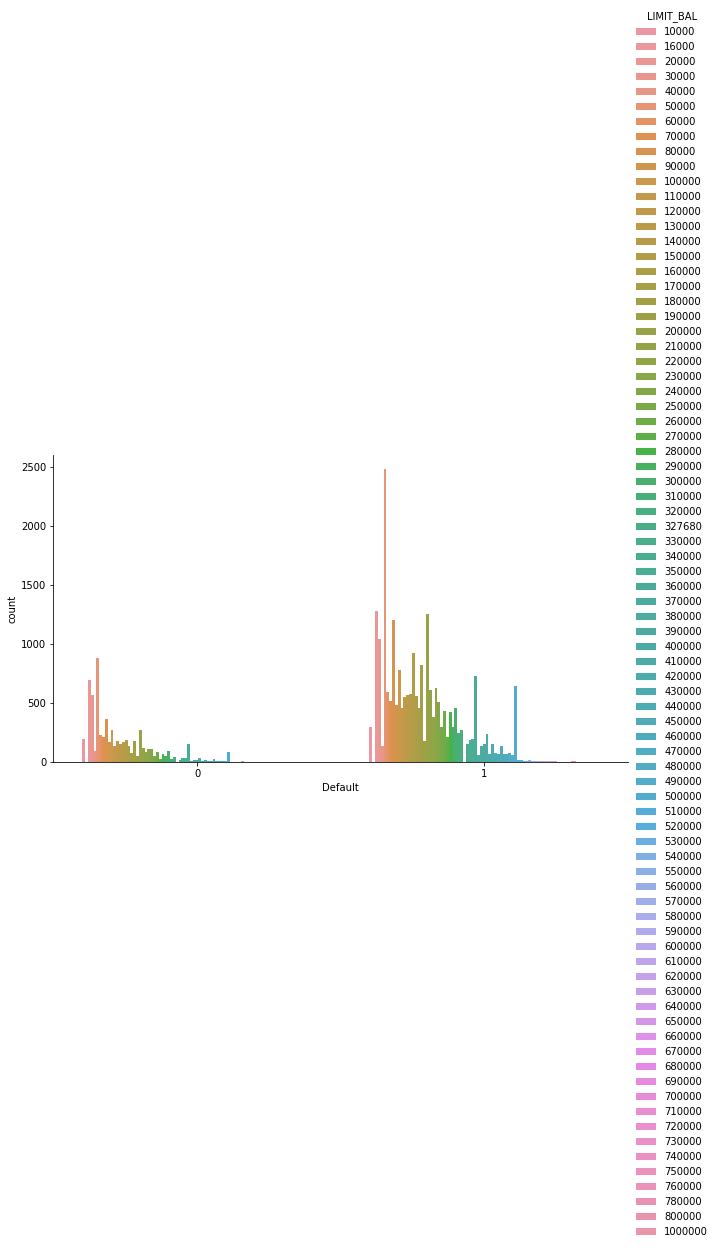

In [39]:
fg = sns.factorplot('default', data=credit, hue='LIMIT_BAL', kind='count', aspect=1.75)
fg.set_xlabels('Default')

In [40]:
credit.groupby(['AGE', 'default'])['AGE'].count()

AGE  default
21   0           14
     1           53
22   0          169
     1          391
23   0          247
               ... 
73   1            1
74   1            1
75   0            1
     1            2
79   1            1
Name: AGE, Length: 109, dtype: int64

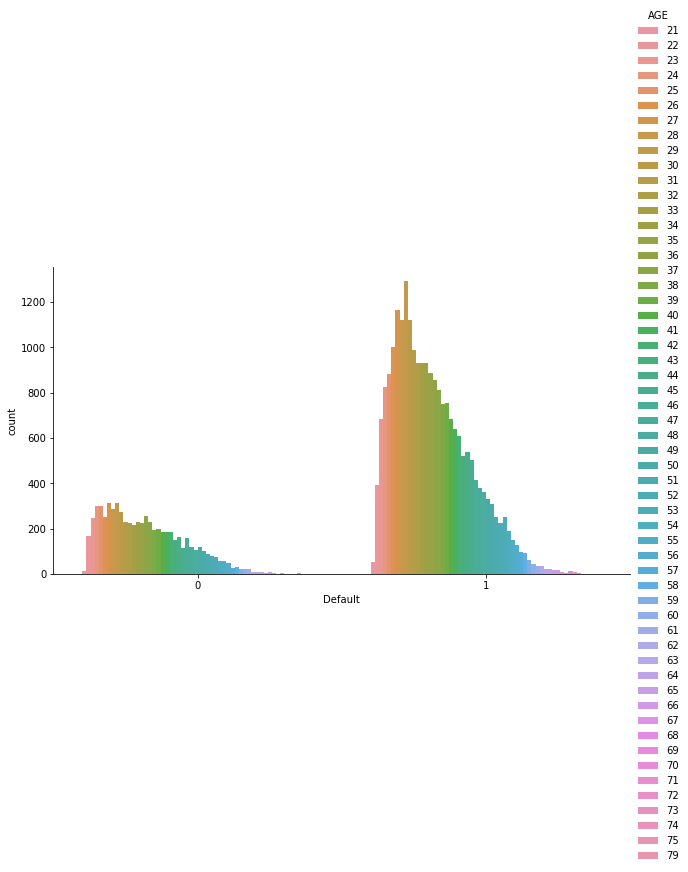

In [41]:
fg = sns.factorplot('default', data=credit, hue='AGE', kind='count', aspect=1.75)
fg.set_xlabels('Default')

In [42]:
 credit.groupby(['EDUCATION_graduate school', 'default'])['EDUCATION_graduate school'].count()

EDUCATION_graduate school  default
0                          0           4600
                           1          14815
1                          0           2036
                           1           8549
Name: EDUCATION_graduate school, dtype: int64

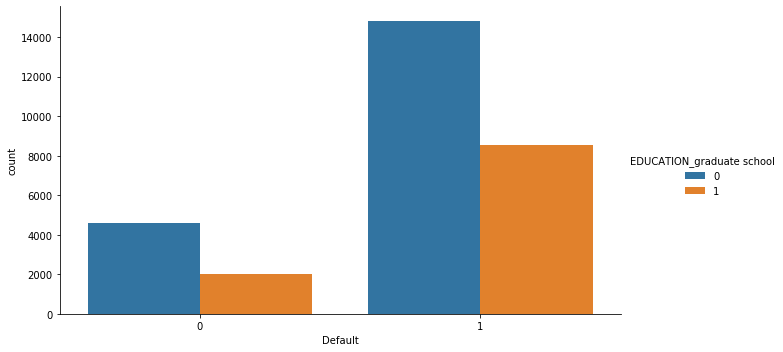

In [43]:
fg = sns.factorplot('default', data=credit, hue='EDUCATION_graduate school', kind='count', aspect=1.75)
fg.set_xlabels('Default')

In [44]:
 credit.groupby(['EDUCATION_high school', 'default'])['EDUCATION_high school'].count()

EDUCATION_high school  default
0                      0           5399
                       1          19684
1                      0           1237
                       1           3680
Name: EDUCATION_high school, dtype: int64

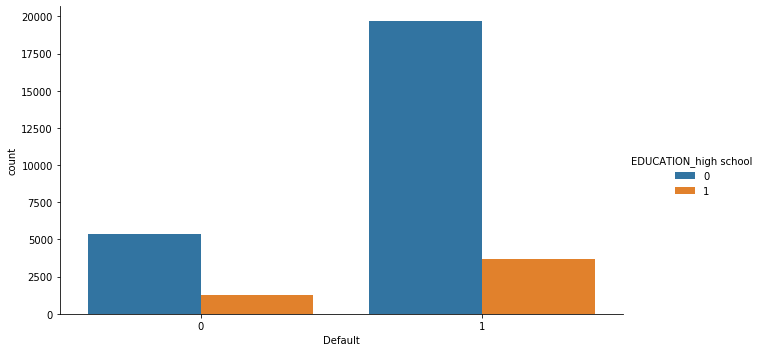

In [45]:
fg = sns.factorplot('default', data=credit, hue='EDUCATION_high school', kind='count', aspect=1.75)
fg.set_xlabels('Default')

In [46]:
credit.groupby(['EDUCATION_other', 'default'])['EDUCATION_other'].count()

EDUCATION_other  default
0                0           6603
                 1          22929
1                0             33
                 1            435
Name: EDUCATION_other, dtype: int64

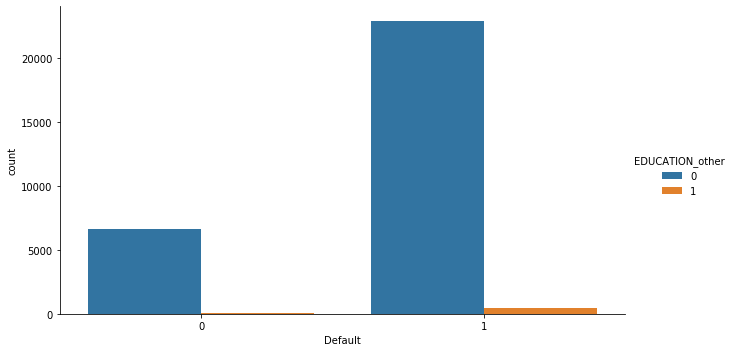

In [47]:
fg = sns.factorplot('default', data=credit, hue='EDUCATION_other', kind='count', aspect=1.75)
fg.set_xlabels('Default')

In [48]:
credit.groupby(['EDUCATION_university', 'default'])['EDUCATION_university'].count()

EDUCATION_university  default
0                     0           3306
                      1          12664
1                     0           3330
                      1          10700
Name: EDUCATION_university, dtype: int64

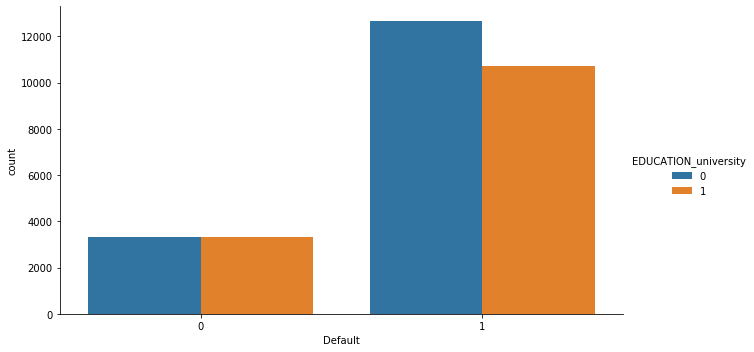

In [49]:
fg = sns.factorplot('default', data=credit, hue='EDUCATION_university', kind='count', aspect=1.75)
fg.set_xlabels('Default')

In [50]:
 credit.groupby(['PAY_2', 'default'])['PAY_2'].count()

PAY_2  default
0      0           4160
       1          21402
1      0              5
       1             23
2      0           2184
       1           1743
3      0            201
       1            125
4      0             50
       1             49
5      0             15
       1             10
6      0              9
       1              3
7      0             12
       1              8
8      1              1
Name: PAY_2, dtype: int64

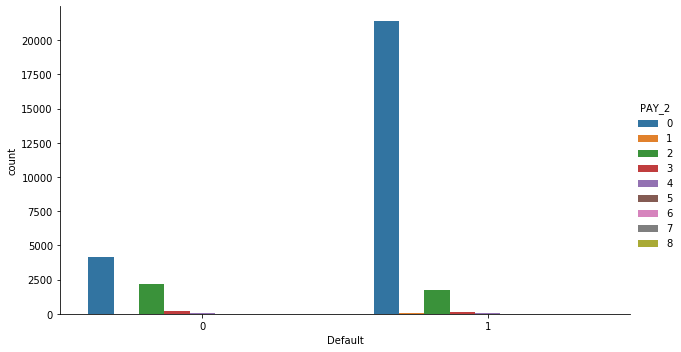

In [51]:
fg = sns.factorplot('default', data=credit, hue='PAY_2', kind='count', aspect=1.75)
fg.set_xlabels('Default')

In [ ]:
EDUCATION_other